# Linear Transformations

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
reload(dm)
reload(ut)
print ''

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

So far we've been treating the matrix equation

$$ A{\bf x} = {\bf b}$$

as simply another way of writing the vector equation

$$ x_1{\bf a_1} + \dots + x_n{\bf a_n} = {\bf b}.$$

However, we'll now think of the matrix equation in a new way: we will think of $A$ as "acting on" the vector ${\bf x}$ to form a new vector ${\bf b}$.

For example, let's let $A = \left[\begin{array}{rrrr}4&-3&1&3\\2&0&5&1\end{array}\right].$  Then we find:

$$ A \left[\begin{array}{r}1\\1\\1\\1\end{array}\right] = \left[\begin{array}{r}5\\8\end{array}\right] \;\;\; \mbox{and} \;\;\; A \left[\begin{array}{r}1\\4\\-1\\3\end{array}\right] = \left[\begin{array}{r}0\\0\end{array}\right].$$

In other words, if ${\bf x} = \left[\begin{array}{r}1\\1\\1\\1\end{array}\right]$ and ${\bf b} = \left[\begin{array}{r}5\\8\end{array}\right]$, then $A$ _transforms_ ${\bf x}$ into ${\bf b}$.

Likewise, if ${\bf u} =\left[\begin{array}{r}1\\4\\-1\\3\end{array}\right],$ then $A$ transforms ${\bf u}$ into the ${\bf 0}$ vector.

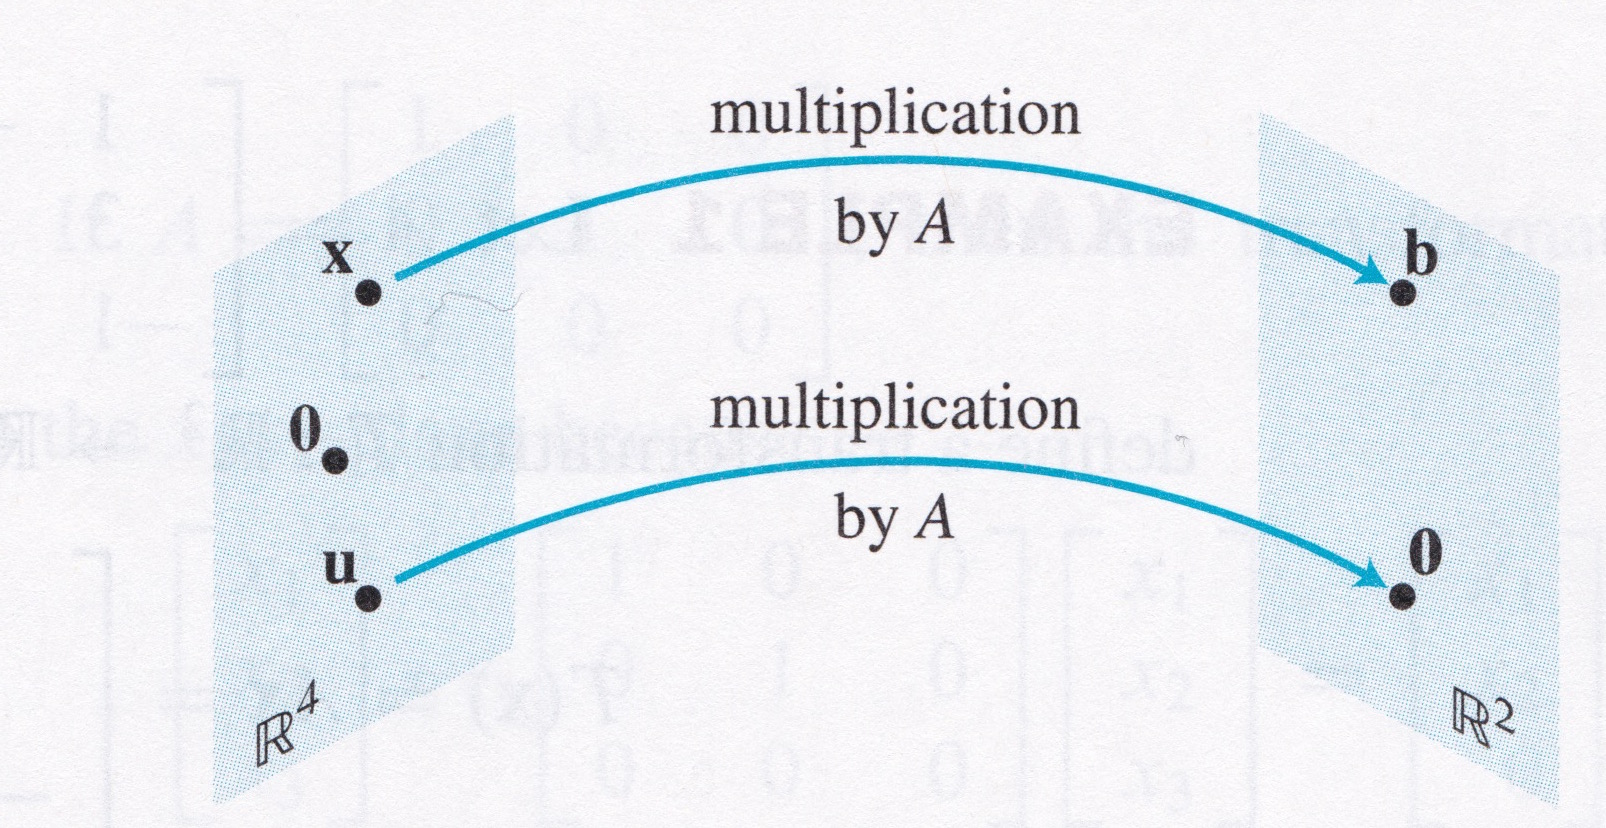

In [3]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-8-1.jpg", width=450))

This gives a __new__ way of thinking about solving $A{\bf x} = {\bf b}$.  We are "searching" for the vectors ${\bf x}$ in $\mathbb{R}^4$ that are transformed into ${\bf b}$ in $\mathbb{R}^2$ under the "action" of $A$. 

So the mapping from ${\bf x}$ to $A{\bf x}$ is a __function__ from one set of vectors (those in $\mathbb{R}^4$) to another.  

We have moved out of the familiar world of functions of one variable:  we are now thinking about functions that transform a vector into a vector.  

Or, put another way, functions that transform multiple variables into multiple variables.

Some terminology:

A __transformation__ (or __function__ or __mapping__) $T$ from $\mathbb{R}^n$ to $\mathbb{R}^m$ is a rule that assigns to each vector ${\bf x}$ in $\mathbb{R}^n$ a vector $T({\bf x})$ in $\mathbb{R}^m$.   

The set $\mathbb{R}^n$ is called the __domain__ of $T$, and $\mathbb{R}^m$ is called the __codomain__ of $T$.  

The notation:

$$ T: \mathbb{R}^n \rightarrow \mathbb{R}^m$$ 

indicates that the domain of $T$ is $\mathbb{R}^n$ and the codomain is $\mathbb{R}^m$.

For $\bf x$ in $\mathbb{R}^n,$ the vector $T({\bf x})$ is called the __image__ of $\bf x$ (under $T$).  The set of all images $T({\bf x})$ is called the __range__ of $T$.

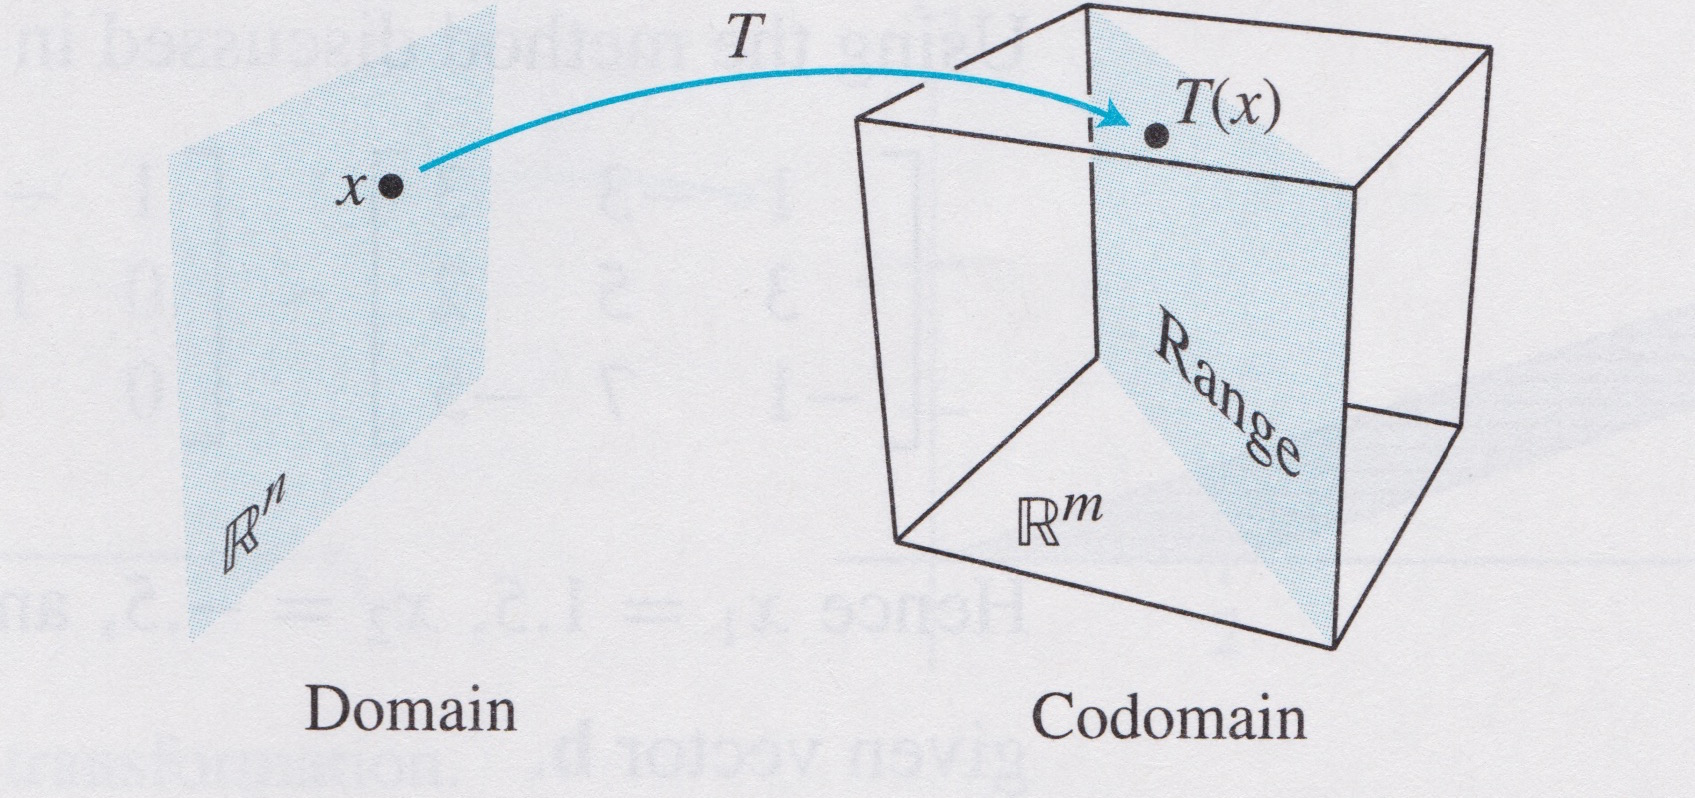

In [4]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-8-2.jpg", width=450))

## Question Time! Q6.1

Let's do an example.   Let's say I have these points in $\mathbb{R}^2$:

$$ \left[\begin{array}{r}0\\1\end{array}\right],\left[\begin{array}{r}1\\1\end{array}\right],\left[\begin{array}{r}1\\0\end{array}\right],\left[\begin{array}{r}0\\0\end{array}\right]$$

Where are these points located?

[[ 0.  1.  1.  0.]
 [ 1.  1.  0.  0.]]


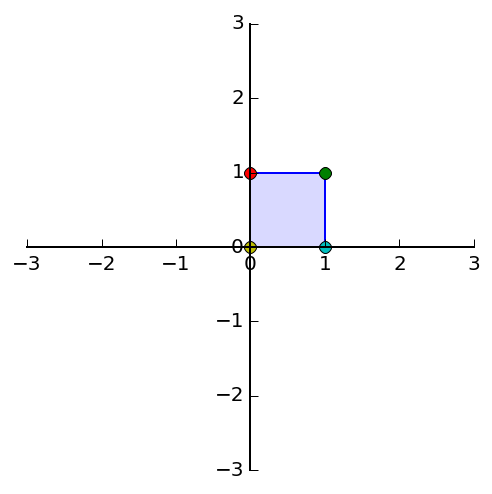

In [5]:
square = np.array([[0.0,1,1,0],[1,1,0,0]])
ax = dm.plotSetup(-3,3,-3,3)
print square
dm.plotSquare(square)

Now let's transform each of these points according to the following rule.   Let 

$$ A = \left[\begin{array}{rr}1&1.5\\0&1\end{array}\right]. $$

We define $T({\bf x}) = A{\bf x}$.  Then we have 

$$ T: \mathbb{R}^2 \rightarrow \mathbb{R}^2.$$

What is the image of each of these points under $T$?

$$ A\left[\begin{array}{r}0\\1\end{array}\right] = \left[\begin{array}{r}1.5\\1\end{array}\right]$$


$$ A\left[\begin{array}{r}1\\1\end{array}\right] = \left[\begin{array}{r}2.5\\1\end{array}\right]$$


$$ A\left[\begin{array}{r}1\\0\end{array}\right] = \left[\begin{array}{r}1\\0\end{array}\right]$$


$$ A\left[\begin{array}{r}0\\0\end{array}\right] = \left[\begin{array}{r}0\\0\end{array}\right]$$

square = 
[[ 0.  1.  1.  0.]
 [ 1.  1.  0.  0.]]
A matrix = 
[[ 1.   1.5]
 [ 0.   1. ]]
sheared square = 
[[ 1.5  2.5  1.   0. ]
 [ 1.   1.   0.   0. ]]


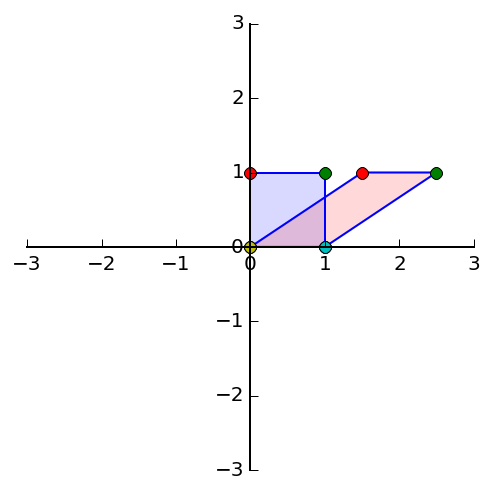

In [6]:
ax = dm.plotSetup(-3,3,-3,3)
print "square = "; print square
dm.plotSquare(square)
#
# create the A matrix
A = np.array([[1.0, 1.5],[0.0,1.0]])
print "A matrix = "; print A
#
# apply the shear matrix to the square
ssquare = np.zeros(np.shape(square))
for i in range(4):
    ssquare[:,i] = dm.AxVS(A,square[:,i])
print "sheared square = "; print ssquare
dm.plotSquare(ssquare,'r')

This sort of transformation, where points are successively slid sideways, is called a __shear__ transformation.

We'll be looking at a number of examples in python.  

Notice how we multiplied each column of 'square' by $A$.

In python/numpy, every matrix has a `.dot()` method.  This method multiplies the matrix by every column of its argument, returing the results as a matrix.

That is:

    A.dot(B)
    
where `A` and `B` are matrices, will multiply `A` by every column of `B`, and the resulting vectors will be formed into a matrix.

## Linear Transformations

By the properties of matrix-vector multiplication, we know that the transformation ${\bf x} \mapsto A{\bf x}$ has the properties that 

$$ A({\bf u} + {\bf v}) = A{\bf u} + A{\bf v} \;\;\;\mbox{and}\;\;\; A(c{\bf u}) = cA{\bf u}$$

for all $\bf u, v$ in $\mathbb{R}^n$ and all scalars $c$.

We are now ready to define one of the most fundamental concepts in the course: the concept of a _linear transformation_.  

(You are now finding out why the subject is called linear algebra!)

__Definition.__  A transformation $T$ is __linear__ if:
1. $T({\bf u} + {\bf v}) = T({\bf u}) + T({\bf v}) \;\;\;$ for all $\bf u, v$ in the domain of $T$; and
2. $T(c{\bf u}) = cT({\bf u}) \;\;\;$ for all scalars $c$ and all $\bf u$ in the domain of $T$.

## Question Time! Q6.2

To fully grasp the significance of what a linear transformation is, don't think of just matrix-vector multiplication.  Think of $T$ as a function in more general terms.  

The definition above captures a _lot_ of functions that are not matrix-vector multiplication.  For example, think of:
$$ T(x) = \int_0^1 x(t) \,dt $$
Is $T$ a linear function?

## The Matrix of a Linear Transformation

Not all linear transformations are matrix-vector multiplications.   But, __every linear transformation from vectors to vectors is a matrix multiplication.__ 

__Theorem.__  Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation.   There there is a unique matrix $A$ such that:

$$ T({\bf x}) = A{\bf x} \;\;\; \mbox{for all}\; {\bf x} \in \mathbb{R}^n.$$

In fact, $A$ is the $m \times n$ matrix whose $j$th column is the vector $T({\bf e_j})$, where ${\bf e_j}$ is the $j$the column of the identity matrix in $\mathbb{R}^n$:

$$A = \left[T({\bf e_1}) \dots T({\bf e_n})\right].$$

$A$ is called the _standard matrix_ of $T$.

__Proof.__  Write 

$${\bf x} = I{\bf x} = \left[{\bf e_1} \dots {\bf e_n}\right]\bf x$$

$$ = x_1{\bf e_1} + \dots + x_n{\bf e_n}.$$

Because $T$ is linear, we have:

$$ T({\bf x}) = T(x_1{\bf e_1} + \dots + x_n{\bf e_n})$$

$$ = x_1T({\bf e_1}) + \dots + x_nT({\bf e_n})$$

$$ = \left[T({\bf e_1}) \dots T({\bf e_n})\right] \, \left[\begin{array}{r}x_1\\\vdots\\x_n\end{array}\right] = A{\bf x}.$$

For example, we find the standard matrix of a linear tranformation of $\mathbb{R}^2$ by asking what the transfomation does to two particular points:

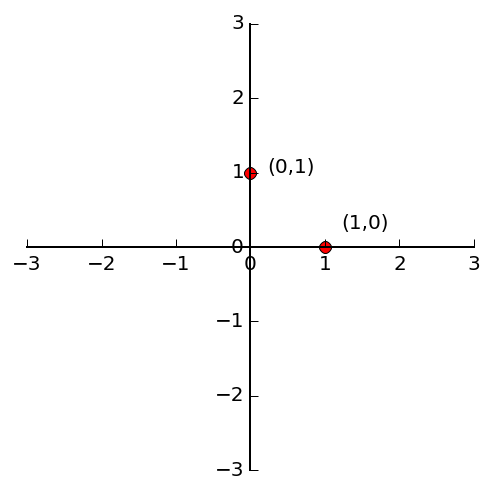

In [7]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup(-3,3,-3,3)
ax.plot([0],[1],'ro')
ax.text(0.25,1,'(0,1)')
ax.plot([1],[0],'ro')
ax.text(1.25,0.25,'(1,0)')
print ''

This is a hugely powerful tool.  Let's say we start from a linear transformation; we can use this to find the matrix that implements that linear transformation.  

For example, let's see how to compute the linear transformation that is a rotation.

__Example.__  Let $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be the transformation that rotates each point in $\mathbb{R}^2$ about the origin through an angle $\varphi$, with counterclockwise rotation for a positive angle.  Find the standard matrix $A$ of this transformation.

__Solution.__  The columns of $I$ are ${\bf e_1} = \left[\begin{array}{r}1\\0\end{array}\right]$ and ${\bf e_2} = \left[\begin{array}{r}0\\1\end{array}\right].$

Referring to the diagram below, we can see that $\left[\begin{array}{r}1\\0\end{array}\right]$ rotates into $\left[\begin{array}{r}\cos\varphi\\\sin\varphi\end{array}\right],$ and $\left[\begin{array}{r}0\\1\end{array}\right]$ rotates into $\left[\begin{array}{r}-\sin\varphi\\\cos\varphi\end{array}\right].$

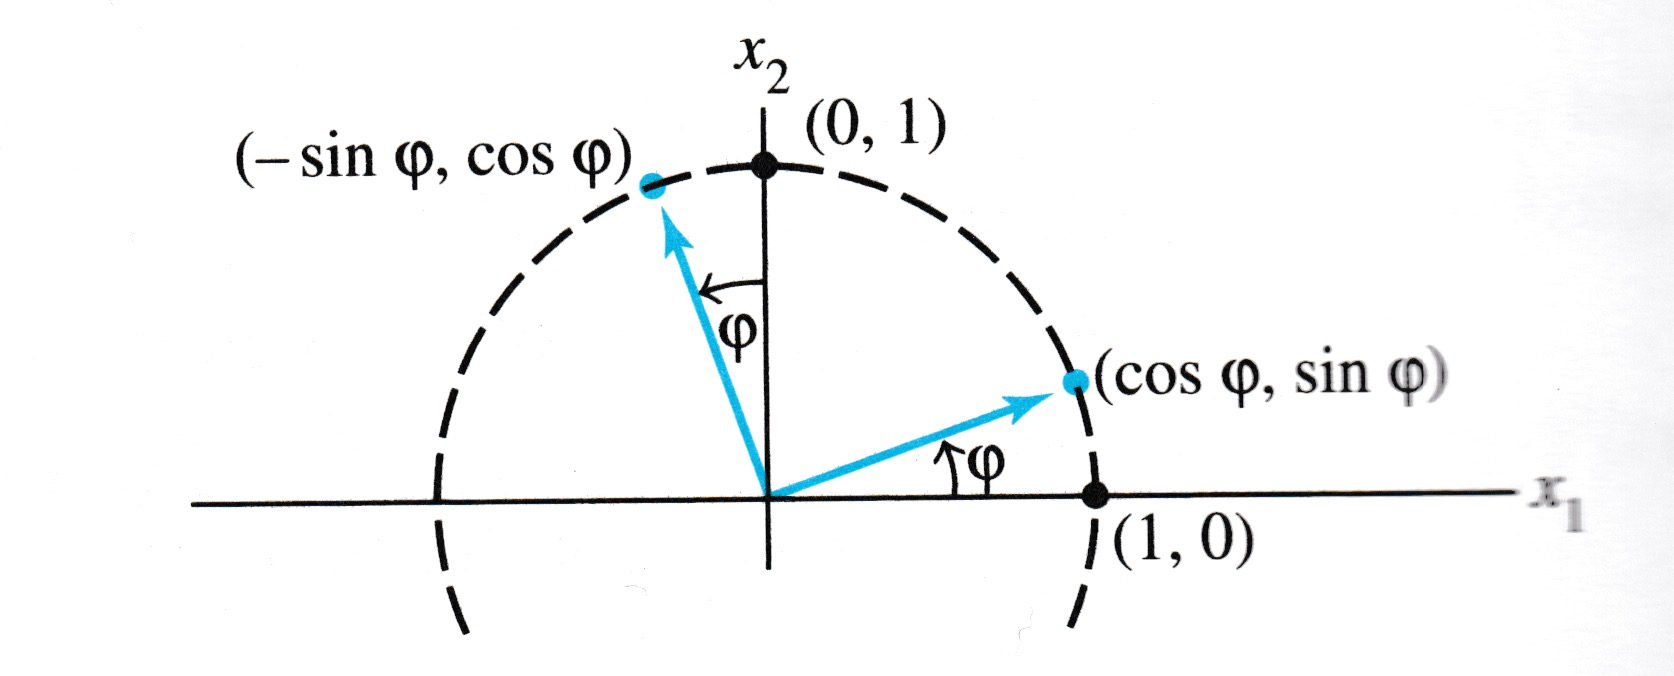

In [8]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/rotate-example.jpeg", width=450))

So by the Theorem above, 

$$ A = \left[\begin{array}{rr}\cos\varphi&-\sin\varphi\\\sin\varphi&\cos\varphi\end{array}\right].$$

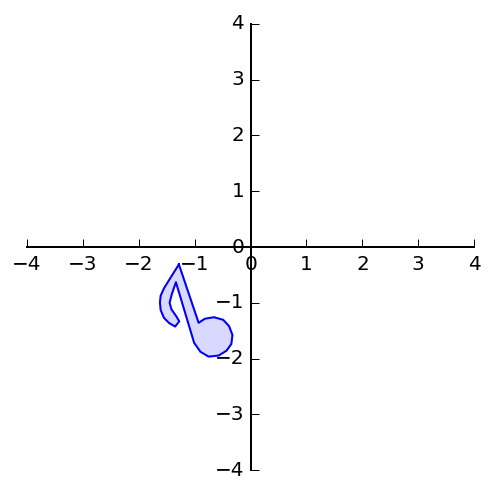

In [9]:
ax = dm.plotSetup(-4,4,-4,4)
note = dm.mnote()
angle = 180.0; phi = (angle/360.0) * 2.0 * np.pi
rotate = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])
rnote = rotate.dot(note)
dm.plotShape(rnote)

## Question Time! Q6.3

## Geometric Linear Transformations of $\mathbb{R}^2$

Let's look at some linear transformations of $\mathbb{R}^2$ to $\mathbb{R}^2$.

First, let's say we want to _scale up_ every point -- move every point further from the origin.   Let's say it's by a factor of 2.5.

Where do ${\bf e_1}$ and ${\bf e_2}$ go?

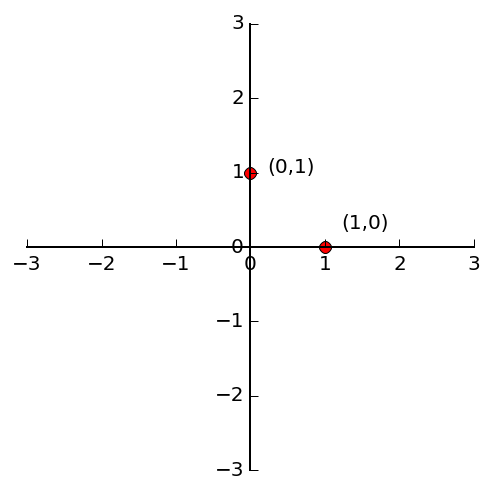

In [10]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup(-3,3,-3,3)
ax.plot([0],[1],'ro')
ax.text(0.25,1,'(0,1)')
ax.plot([1],[0],'ro')
ax.text(1.25,0.25,'(1,0)')
print ''

[[ 2.5  0. ]
 [ 0.   2.5]]


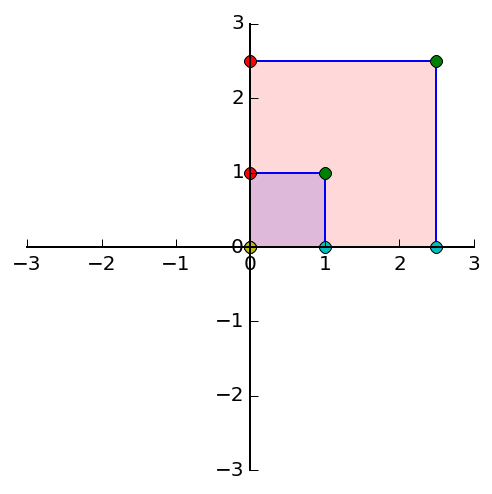

In [11]:
A = np.array([[2.5,0],[0,2.5]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')

OK, now let's reflect through the $x_1$ axis.   Where do ${\bf e_1}$ and ${\bf e_2}$ go?

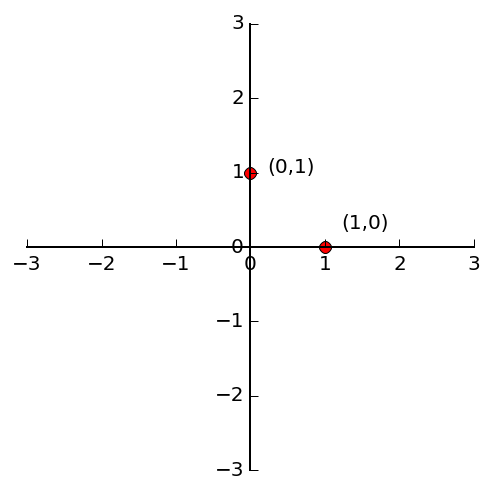

In [12]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup(-3,3,-3,3)
ax.plot([0],[1],'ro')
ax.text(0.25,1,'(0,1)')
ax.plot([1],[0],'ro')
ax.text(1.25,0.25,'(1,0)')
print ''

[[ 1  0]
 [ 0 -1]]


<IPython.core.display.Latex object>

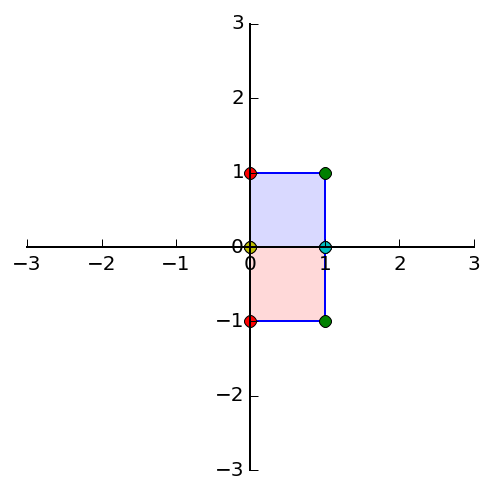

In [13]:
A = np.array([[1,0],[0,-1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the $x_1$ axis')

[[-1  0]
 [ 0  1]]


<IPython.core.display.Latex object>

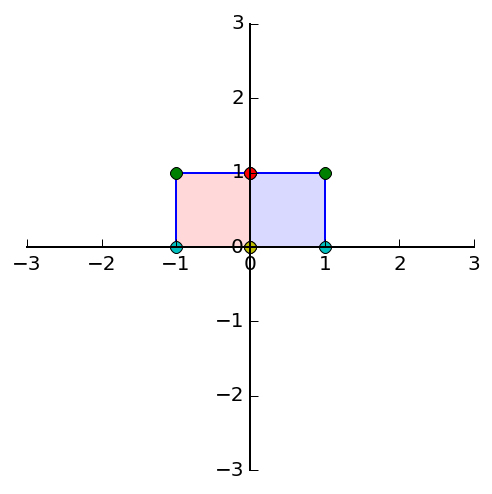

In [14]:
A = np.array([[-1,0],[0,1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the $x_2$ axis')

[[0 1]
 [1 0]]


<IPython.core.display.Latex object>

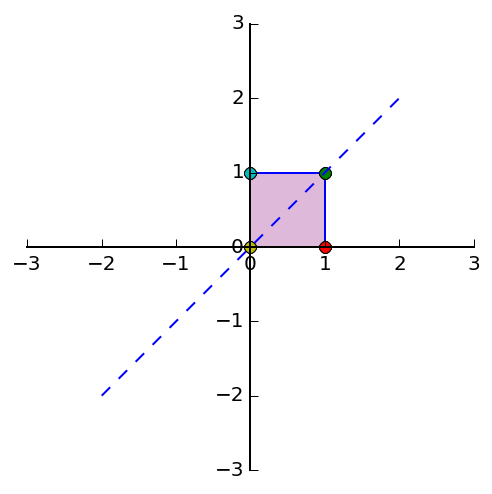

In [15]:
A = np.array([[0,1],[1,0]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
plt.plot([-2,2],[-2,2],'b--')
Latex(r'Reflection through the line $x_1 = x_2$')

[[ 0 -1]
 [-1  0]]


<IPython.core.display.Latex object>

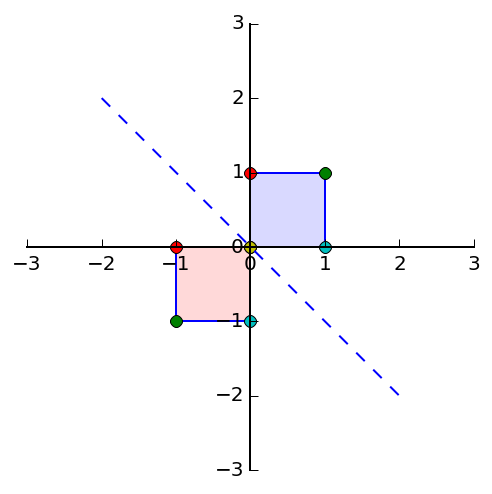

In [16]:
A = np.array([[0,-1],[-1,0]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
plt.plot([-2,2],[2,-2],'b--')
Latex(r'Reflection through the line $x_1 = -x_2$')

[[-1  0]
 [ 0 -1]]


<IPython.core.display.Latex object>

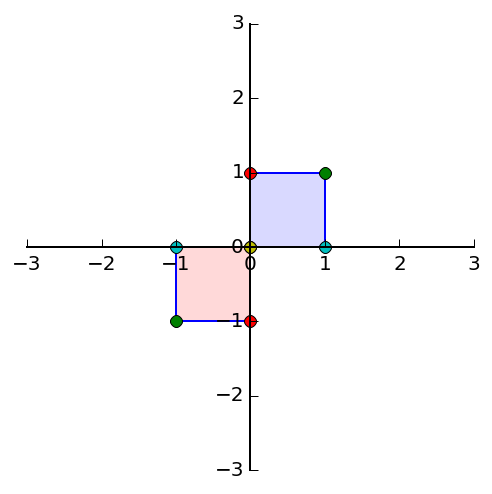

In [17]:
A = np.array([[-1,0],[0,-1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the origin')

[[ 0.45  0.  ]
 [ 0.    1.  ]]


<IPython.core.display.Latex object>

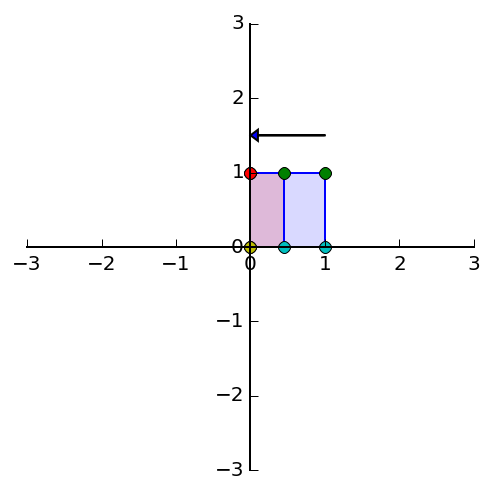

In [18]:
A = np.array([[0.45,0],[0,1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
ax.arrow(1.0,1.5,-1.0,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Horizontal Contraction')

[[ 2.5  0. ]
 [ 0.   1. ]]


<IPython.core.display.Latex object>

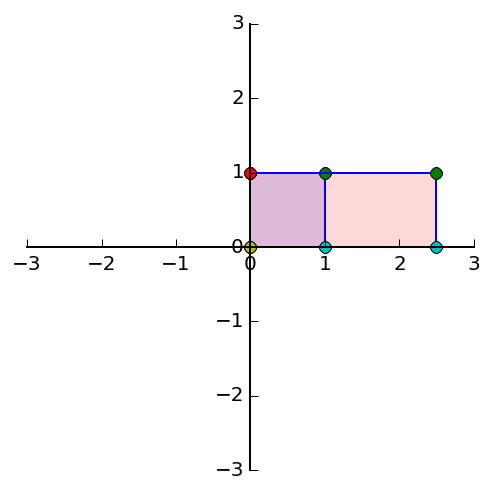

In [19]:
A = np.array([[2.5,0],[0,1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Horizontal Expansion')

[[ 1.   0. ]
 [-1.5  1. ]]


<IPython.core.display.Latex object>

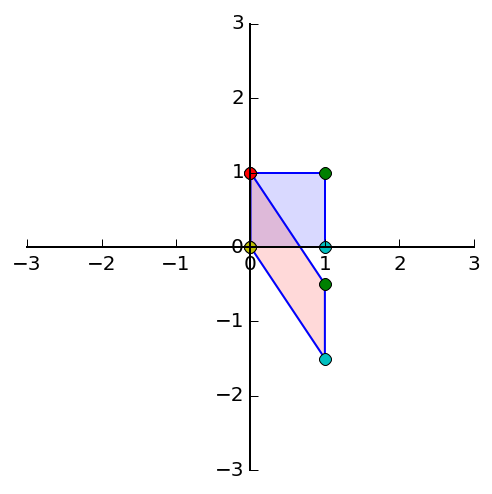

In [20]:
A = np.array([[1,0],[-1.5,1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Vertical Shear')

[[1 0]
 [0 0]]


<IPython.core.display.Latex object>

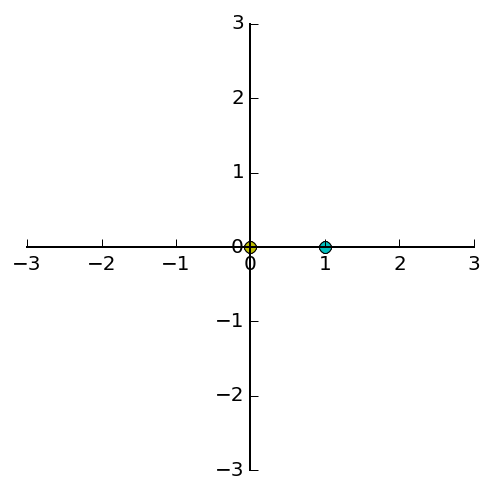

In [21]:
A = np.array([[1,0],[0,0]])
print A
ax = dm.plotSetup(-3,3,-3,3)
# dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
# ax.arrow(1.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
# ax.arrow(0.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_1$ axis')

[[0 0]
 [0 1]]


<IPython.core.display.Latex object>

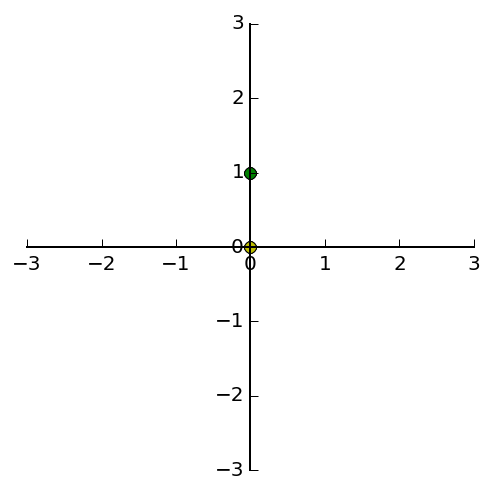

In [22]:
A = np.array([[0,0],[0,1]])
print A
ax = dm.plotSetup(-3,3,-3,3)
# dm.plotSquare(square)
dm.plotSquare(A.dot(square))
#ax.arrow(1.0,1.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
#ax.arrow(1.0,0.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_2$ axis')

## Onto and One-to-One

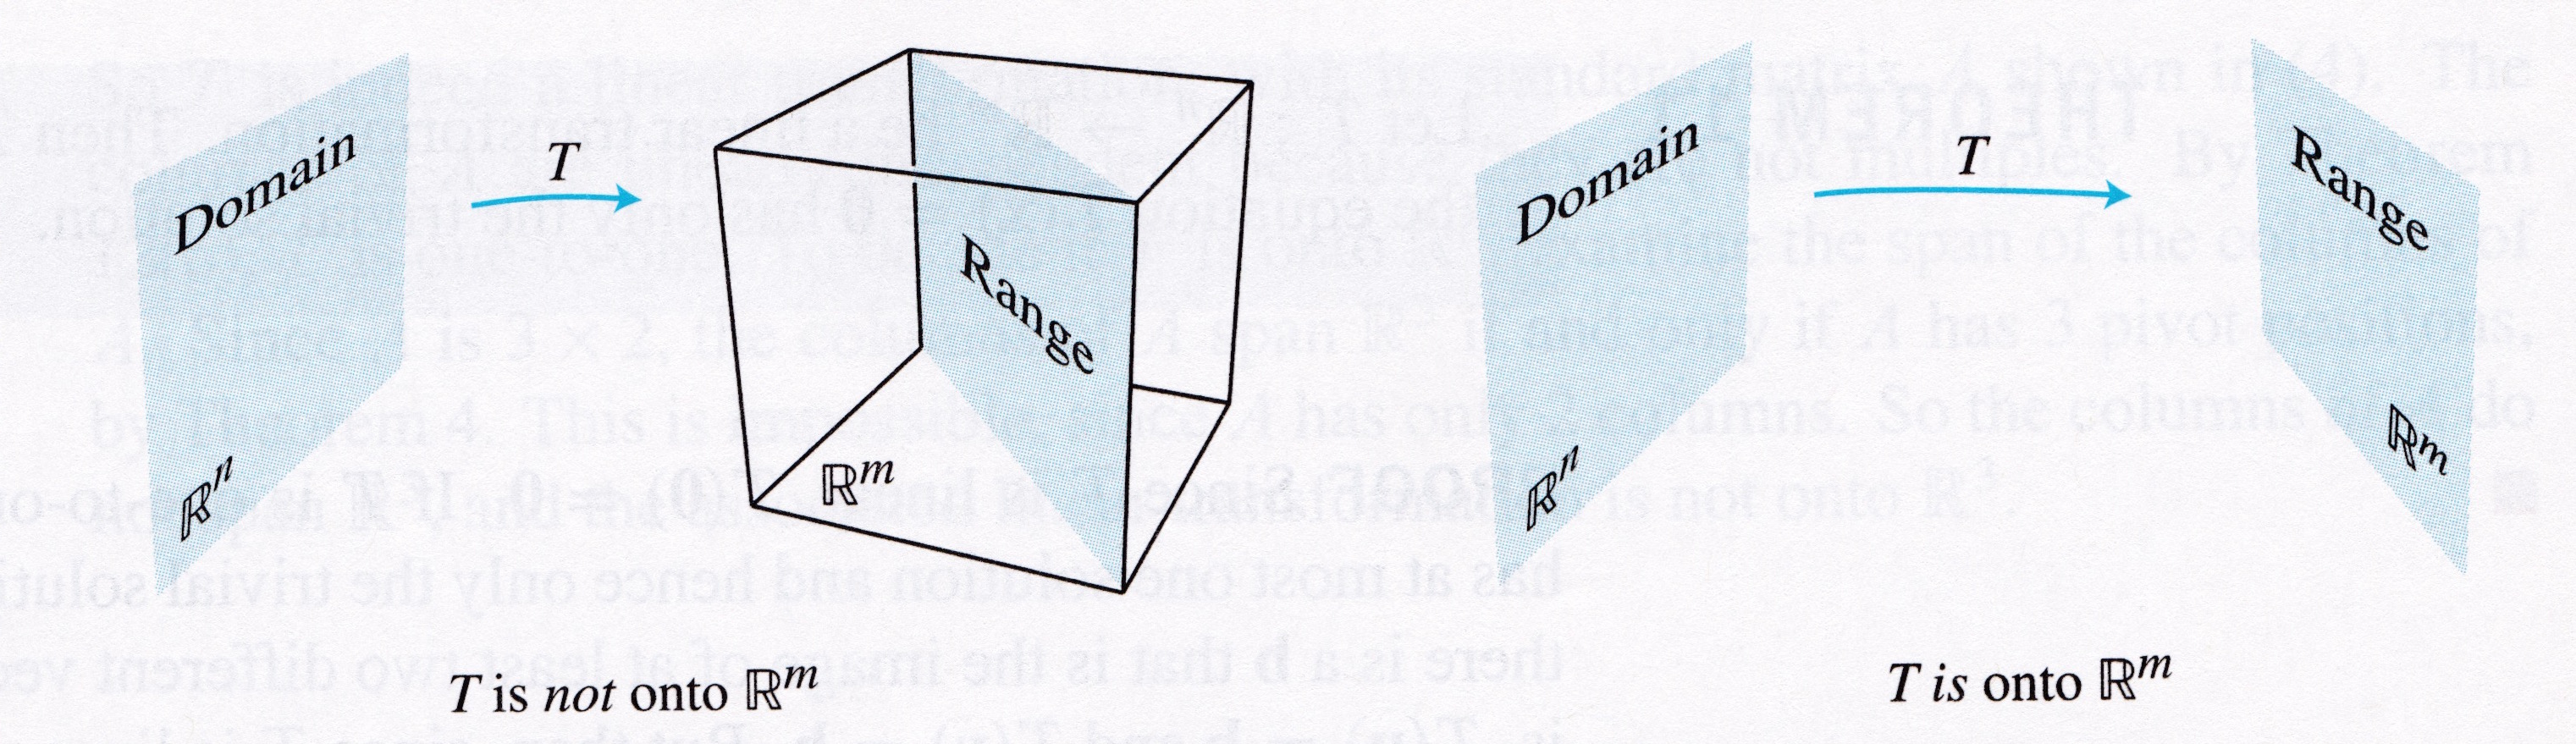

In [23]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-9-3.jpeg", width=450))

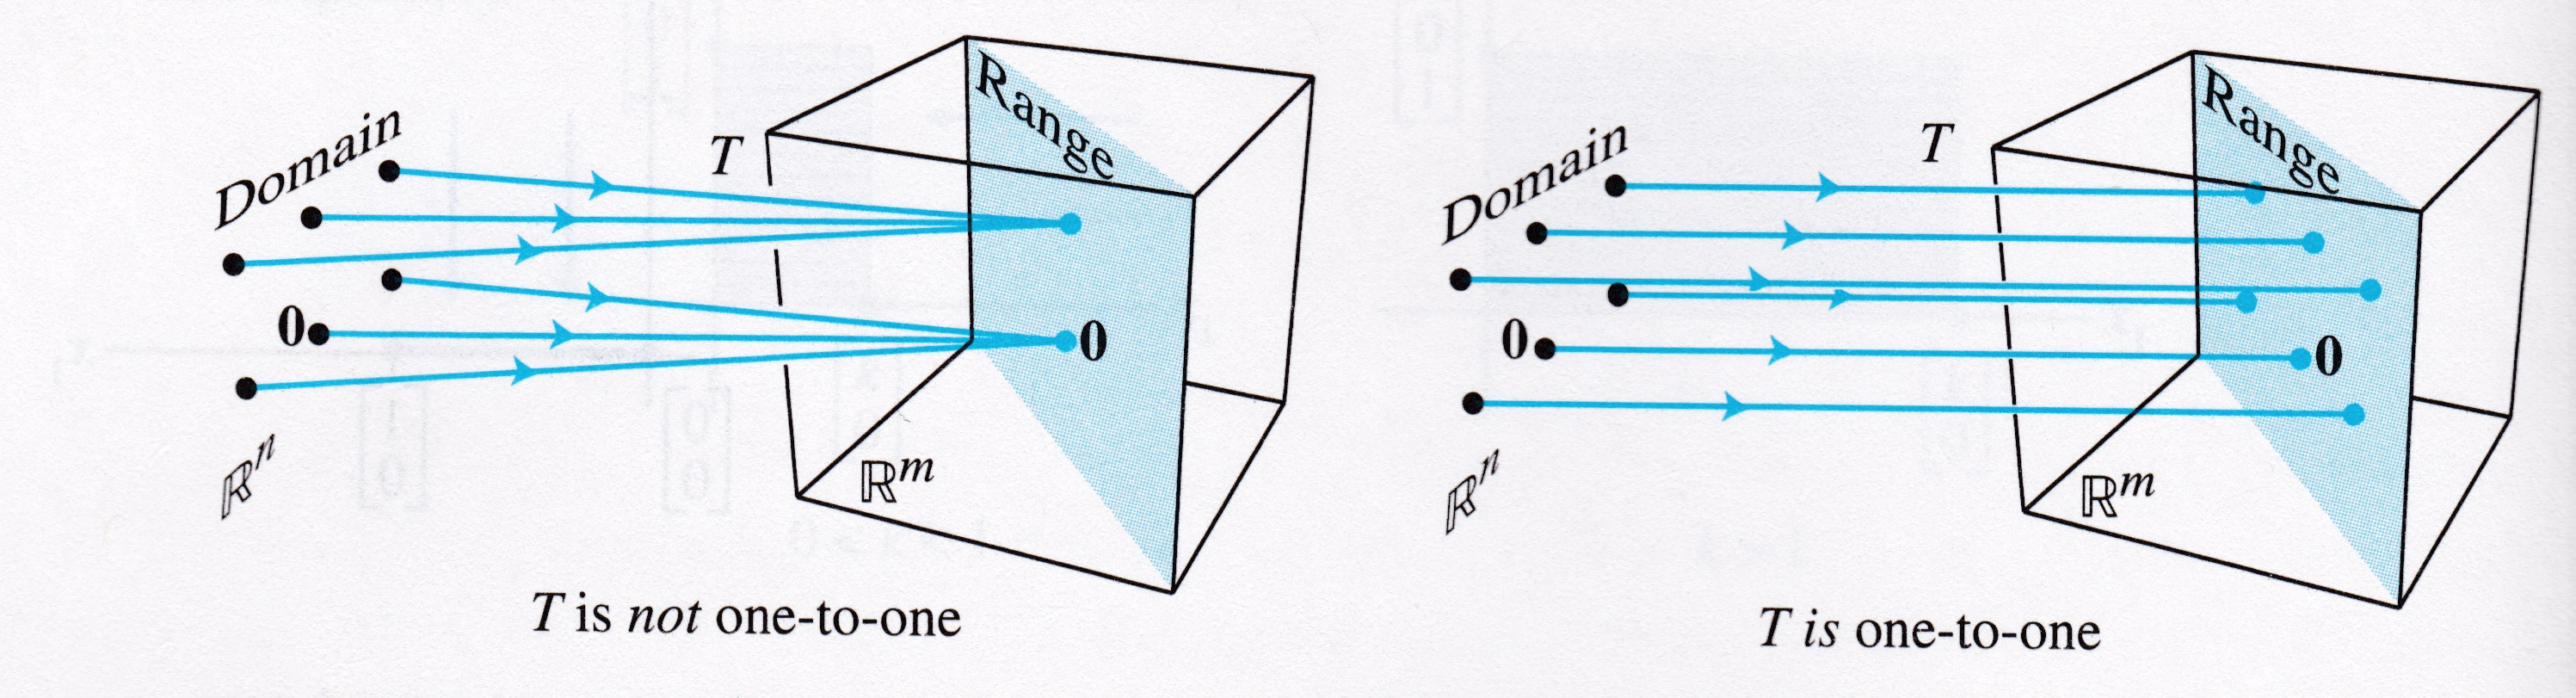

In [24]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-9-4.jpeg", width=450))